<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Activity/blob/main/Activity_week6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Data.csv")

In [ ]:
data.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface area (km2)                          196 non-null    int64  
 3   Population in thousands (2017)              196 non-null    int64  
 4   GDP per capita (current US$)                196 non-null    float64
 5   Agricultural production index               196 non-null    int64  
 6   International trade: Imports (million US$)  196 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.8+ KB


### **1) -Find out the no of countries ?**

In [ ]:
data["country"].nunique()

196

***We found out above the no of countries is 196***

### **2)- Examine the data by using visualizations.**

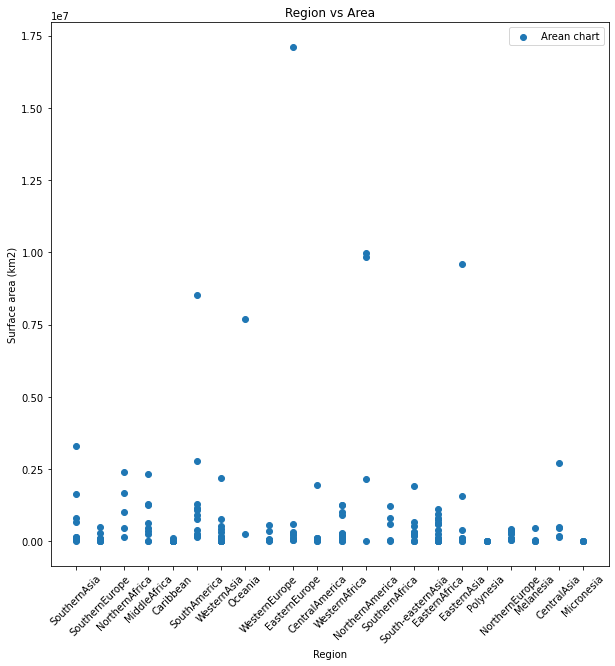

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data["Region"] , data["Surface area (km2)"] , label="Arean chart")
plt.xticks()
plt.xticks(rotation=45)
plt.yticks()
plt.legend()
plt.xlabel("Region")
plt.ylabel("Surface area (km2)")
plt.title("Region vs Area")
plt.show()

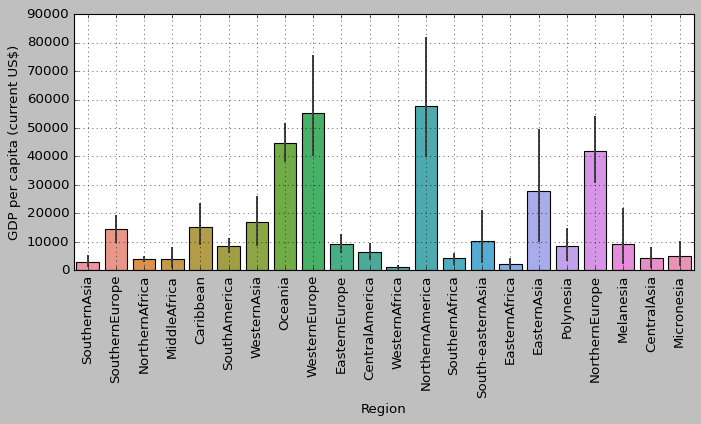

In [9]:
fig=plt.subplots(figsize=(10,4))
plt.style.use("classic")
sns.barplot(x='Region',y='GDP per capita (current US$)',data=data)
plt.xticks(rotation=90)
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


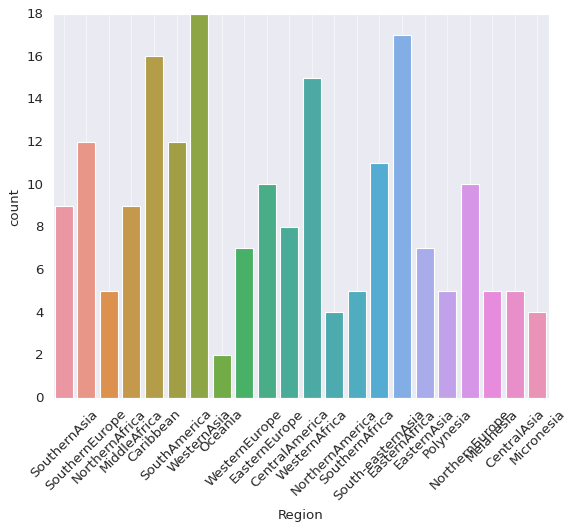

In [18]:
sns.set_style("darkgrid")
sns.countplot(data['Region'])
plt.xticks(rotation=45)
plt.grid()

### **3)- Find out how many countries with respect to the region are availablein the dataset**

In [ ]:
data_Region = data.groupby("Region")


In [ ]:
data_Region["Region"].count()

Region
Caribbean            16
CentralAmerica        8
CentralAsia           5
EasternAfrica        17
EasternAsia           7
EasternEurope        10
Melanesia             5
Micronesia            4
MiddleAfrica          9
NorthernAfrica        5
NorthernAmerica       4
NorthernEurope       10
Oceania               2
Polynesia             5
South-easternAsia    11
SouthAmerica         12
SouthernAfrica        5
SouthernAsia          9
SouthernEurope       12
WesternAfrica        15
WesternAsia          18
WesternEurope         7
Name: Region, dtype: int64

### **4)- On average which region has the highest -**

### a)-GDP per capita (current US$) -

### b) International trade-imports (million) 

In [ ]:
#Here we are finding the mean of all the regions using describe
Average_GDP =data.groupby("Region")["GDP per capita (current US$)"].describe().reset_index()

In [ ]:
#Here we are sorting and finding the max value
mean_GDP =Average_GDP.sort_values(by="mean" ,ascending =False)
mean_GDP.head(1)

,Region,count,mean,std,min,25%,50%,75%,max
10,NorthernAmerica,4.0,57659.0,25749.619445,36976.7,41648.375,49629.7,65640.325,94399.9


***From above we get North America which has highest GDP***

## b) International trade-imports (million)

In [ ]:
#just for standard practise we will replace space with _ in our column names
column_names = data.columns

In [ ]:
for i in column_names:
  new_name = i.replace(" " , "_")
  data.rename(columns= {i:new_name} , inplace =True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface_area_(km2)                          196 non-null    int64  
 3   Population_in_thousands_(2017)              196 non-null    int64  
 4   GDP_per_capita_(current_US$)                196 non-null    float64
 5   Agricultural_production_index_              196 non-null    int64  
 6   International_trade:_Imports_(million_US$)  196 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.8+ KB


In [ ]:
#Here we are finding the mean of all the regions using describe
trade = data.groupby("Region")["International_trade:_Imports_(million_US$)"].describe().reset_index()

In [ ]:
#Here we are sorting and finding the max value
mean_trade = trade.sort_values(by="mean" , ascending = False)
mean_trade.head(1)

,Region,count,mean,std,min,25%,50%,75%,max
10,NorthernAmerica,4.0,663552.25,1.074266e+06,623.0,884.0,201962.5,864630.75,2249661.0


***We can see NorthernAmerica has the highest trade imports***

### **5. Find out which region has more consistent with respect to GDP per**
### **capita (current US$)**

***Consistency can be figured out by finding which region has low standard deviation ***

In [ ]:
df1 = data.groupby("Region")["GDP_per_capita_(current_US$)"].describe().reset_index()

In [ ]:
df2 =df1.sort_values(by="std")


In [ ]:
df2.head(1)

,Region,count,mean,std,min,25%,50%,75%,max
19,WesternAfrica,15.0,1013.14,815.095399,359.0,544.7,703.9,1068.05,3080.2


***We can see Western AFrica is having more consistence wrt to GDP***